In [368]:
from numpy import cos
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import  pandas as pd

## part 1

In [583]:
def cosin2(x, a, x0, y0):
    return y0 + a * cos(np.radians(x+x0))**2

In [586]:
popt, pcov = curve_fit(cosin2, count, adcValuesnp, p0=[80,0,0])

a, x0, y0 = popt
perr = np.sqrt(np.diag(pcov))
a_error , x0_error, y0_error = perr

popt, perr

(array([-80.51074053,   0.69002236,  81.69425915]),
 array([0.17060432, 0.06070572, 0.10447338]))

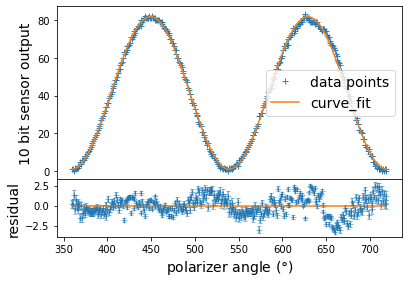

In [587]:
g = plt.figure(figsize=(6,4))

upperframe = g.add_axes((.1,.3,.8,.6))

ys = cosin2(np.array(count), a, x0, y0)
plt.plot(count, adcValuesnp, "+", label = 'data points', alpha=0.9)
plt.plot(count, ys, "-", label='curve_fit')
plt.ylabel('10 bit sensor output', fontsize=14)
plt.legend(fontsize=14)
upperframe.set_xticklabels([])

lowerframe = g.add_axes((.1,.1,.8,.2)) 

y_upper = cosin2(np.array(count), a+a_error, x0, y0+y0_error)
y_lower = cosin2(np.array(count), a-a_error, x0, y0-y0_error)
y_err = y_upper-y_lower
res = ys - np.array(adcValuesnp)
plt.errorbar(count, res, y_err, np.zeros(len(res)), fmt="+",capsize=2, alpha=0.5)
plt.plot(count, np.zeros(len(count)))
plt.xlabel('polarizer angle ($\degree$)', fontsize=14)
plt.ylabel('residual', fontsize=14)

# plt.title('Lazer intensity v.s. ploarizer angle', fontsize=15)

plt.savefig('2_1.pdf', bbox_inches='tight')
plt.show()


## Part 2

In [650]:
df = pd.read_table('data.txt', delimiter=': ', header=None, names=['input','data'])

for i in range(len(df)):
    df['input'][i] = int(df['input'][i])
    arr = df['data'][i][1:-1].split(', ')
    df['data'][i] = [int(j) for j in arr]

df['v'] = [0.005, .325, .646, .966, 1.291, 1.615, 1.804, 1.804, 1.805, 1.806, 1.807, 1.807, 1.808, 1.808, 1.808, 1.808] + [1.185, 1.245, 1.301, 1.363, 1.419, 1.480, 1.540, 1.596, 1.658]
df['intensity'] = [ 7.,  5.,  4.,  2.,  3., 52., 90., 86., 84., 85., 84., 88., 87.,85., 88., 86.] + [ 2.,  5.,  5.,  5.,  5.,  4.,  6., 24., 71.]

def _lin(x, y0):
    return np.zeros(len(x))+y0
df['i_err'] = np.zeros(len(df))
df['current'] = df['v'] / 100 * 1000     # r7 = 100 ohm , convert into mA

for i in range(len(df)):
    popt, _ = curve_fit(_lin, range(len(df['data'][i])), df['data'][i])
    df['i_err'][i] = abs(df['intensity'][i] - popt*2)

df = df.sort_values(['input'], axis=0)
df.index = range(len(df))

/var/folders/_2/d0xmq0nn39z8s3ccvbbr049h0000gn/T/ipykernel_83722/4088173399.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_table('data.txt', delimiter=': ', header=None, names=['input','data'])
/var/folders/_2/d0xmq0nn39z8s3ccvbbr049h0000gn/T/ipykernel_83722/4088173399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['input'][i] = int(df['input'][i])
/var/folders/_2/d0xmq0nn39z8s3ccvbbr049h0000gn/T/ipykernel_83722/4088173399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [651]:
df=df[:16]
df

,input,data,v,intensity,i_err,current
0,0,"[5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, ...",0.005,7.0,3.650000,0.05
1,273,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.325,5.0,1.061111,3.25
2,546,"[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.646,4.0,1.200000,6.46
3,819,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.966,2.0,1.288889,9.66
4,1000,"[0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.185,2.0,0.311111,11.85
5,1050,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1.245,5.0,1.038889,12.45
6,1092,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.291,3.0,0.944444,12.91
7,1100,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1.301,5.0,0.972222,13.01
8,1150,"[3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, ...",1.363,5.0,1.011111,13.63
9,1200,"[3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",1.419,5.0,0.738889,14.19


In [652]:
def lin(x, a, y0):
    return y0 + a*x
'''def exp(x, a, b, x0, y0):
    return y0 + a*np.exp(b*x+x0)'''

'def exp(x, a, b, x0, y0):\n    return y0 + a*np.exp(b*x+x0)'

In [661]:
# left part
popt_l, pcov_l = curve_fit(lin, df['current'][:11], df['intensity'][:11], sigma=df['i_err'][:11])
perr_l = np.sqrt(np.diag(pcov_l))

# right part
popt_r, pcov_r = curve_fit(lin, df['current'][11:15], df['intensity'][11:15], sigma=df['i_err'][11:15])
perr_r = np.sqrt(np.diag(pcov_r))


In [662]:
popt_l,perr_l,popt_r,perr_r

(array([-0.03858543,  3.53930315]),
 array([0.18371866, 2.18827458]),
 array([  49.62112653, -767.76323623]),
 array([ 18.27810424, 291.68562655]))

In [665]:
a_l, y0_l = popt_l
a_r, y0_r = popt_r
intersect_x = (y0_r - y0_l)/(a_l - a_r)

intersect_x_low = (y0_r-y0_l+(perr_r[1]+perr_l[1])) / (a_l-a_r-(perr_r[0]+perr_l[0]))
intersect_x_up = (y0_r-y0_l-(perr_r[1]+perr_l[1])) / (a_l-a_r+(perr_r[0]+perr_l[0]))
intersect_x, np.sqrt(intersect_x_up-intersect_x_low), lin(intersect_x, -0.03858543,  3.53930315)

(15.531756204088534, 5.209039957652294, 2.940003658210076)

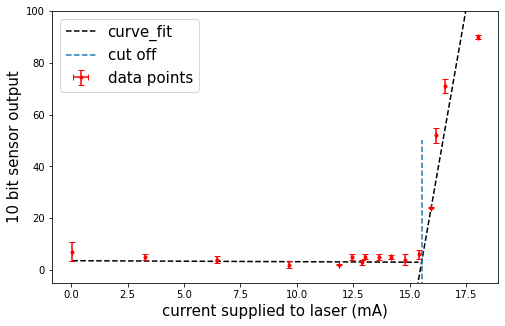

In [664]:
g = plt.figure(figsize=(8,5))

a_l, y0_l = popt_l
a_r, y0_r = popt_r
intersect_x = (y0_r - y0_l)/(a_l - a_r)

l_fit = lin(np.array(df['current'][:12]), a_l, y0_l)
r_fit = lin(np.array(df['current'][10:]), a_r, y0_r)
plt.plot(df['current'][:12], l_fit, "k--")
plt.plot(df['current'][10:], r_fit, "k--", label='curve_fit')

plt.plot([intersect_x,intersect_x], [-100,50], '--', label='cut off')
plt.errorbar(df['current'], df['intensity'], yerr=df['i_err'], xerr=np.zeros(len(df)), fmt="r.", markersize=6, capsize=3, label='data points')


plt.ylim(-5,100)
plt.legend(fontsize=15)
plt.ylabel('10 bit sensor output', fontsize=15)
plt.xlabel('current supplied to laser (mA)', fontsize=15)

plt.savefig('2_4.pdf', bbox_inches='tight')
plt.show()

polarization angle with error: -52.36578834581217 0.1083120114084392
polarization angle with error: -53.23914749395023 0.08103002023199532
polarization angle with error: -53.60596992471382 0.08632122684894163


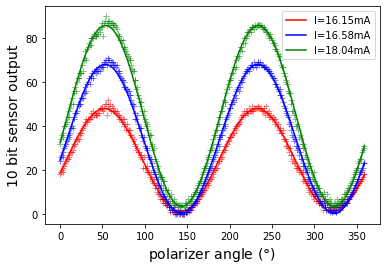

In [578]:
x = np.array(range(len(df['data'][12])))
colors=['violet', 'red', 'blue', 'green']

g = plt.figure(figsize=(6,4))

for i in [13,14,15]:
    current = df['current'][i]
    plt.plot(x, df['data'][i], '+', color=colors[i-12], alpha=0.5)

    popt, pcov = curve_fit(cosin2, x, df['data'][i], p0=[50,0,50])
    a, x0, y0 = popt
    perr = np.sqrt(np.diag(pcov))
    a_error , x0_error, y0_error = perr

    plt.plot(x, cosin2(x, a, x0, y0), "-", color=colors[i-12], label=f'I={current:.2f}mA')
    print('polarization angle with error:', x0, x0_error)

plt.xlabel('polarizer angle ($\degree$)', fontsize=14)
plt.ylabel('10 bit sensor output', fontsize=14)
plt.legend()
plt.savefig('2_4_2.pdf', bbox_inches='tight')
plt.show()


## part 3

In [865]:
from numpy import cos,sqrt,diag,sin, arcsin

In [1044]:
n1, n1_error = 1.000293, 0.000001
n2, n2_error = 1.52, 0.01

def thetaT(thetaI): #, thetaI_error):
  da = sin(thetaI) / (n2 * sqrt( 1- ((n1 * sin(thetaI))**2 / n2**2)))
  db = - n1 * sin(thetaI) / (n2**2 * sqrt(1 - ((n1 * sin(thetaI))**2 / n2**2)))
  dc = n1 * cos(thetaI) / (n2 * sqrt(1 - ((n1 * sin(thetaI))**2 / n2**2)))
  thetaT = arcsin((n1 / n2) * np.sin(thetaI))
  #thetaT_error = sqrt((da*n1_error)**2 + (db * n2_error)**2 + (dc * thetaI_error)**2)
  return thetaT#, thetaT_error

def alpha(thetaI, thetaI_error, thetaT, thetaT_error):
  I, T = thetaI, thetaT
  #a = thetaT
  da = - sin(T)*cos(T)*np.sec(I) / sqrt(1 - sin(T)**2)
  db = sqrt(1  - sin(T)**2) * np.tan(I) * np.sec(I)
  alpha = sqrt(1 - sin(T)**2) / cos(I)
  alpha_error = sqrt((da * thetaT_error)**2 + (db * thetaI_error)**2)
  return alpha, alpha_error

def brewster(thetaI, n2):
  thetaI = np.radians(thetaI - 70)
  al = sqrt(1 - ((n1/n2)*sin(thetaI))**2) / cos(thetaI)
  return al * (n2 / n1) * (2 / (al + (n2 / n1)))**2

def brewsterTangent(n2, n2_error):
  dn1 = n2 / (n1**2 + n2**2)
  dn2 = - n1 / (n1 ** 2 + n2**2)
  angle = np.degrees(np.arctan(n2/n1))
  angle_error = np.degrees(sqrt((dn1 * n2_error)**2 + (dn2 * n1_error)**2))
  return angle, angle_error

#exponential fit
def cos2(x,a,x0,y0):
    return a*(cos(np.radians(x) + x0)**2) + y0

def least_squares_fit_parameters(
    inputs, 
    outputs
):
    popt, pcov = curve_fit(
        brewster, 
        inputs, 
        outputs, 
        p0 = (1.5)
    )
    perr = sqrt(diag(pcov))
    n2 = popt
    n2_error = perr
    return n2, n2_error

 
def polyfitCoefficients(inputs, outputs, deg):
  return np.polyfit(inputs, outputs, deg, cov=True, full=False)

n2,n2_error = least_squares_fit_parameters(count, adcValuesnp)
brewsterAngle, brewsterAngleError = brewsterTangent(n2, n2_error)

brewsterAngle, brewsterAngleError

(array([56.25187202]), array([0.01408389]))

In [1095]:
n2_error=n2-1.5

n2, n2_error

(array([1.49715016]), array([-0.00284984]))

In [1046]:
n_1, n_2 = 1, 1.5
theta_I = count
theta_T = thetaT(count)
arr = 2*n_1*cos(theta_I) / (n_1*cos(theta_I) + n_2*cos(theta_T))

In [1092]:
err = 56.25187202-55.75187202000001
err

0.4999999999999929

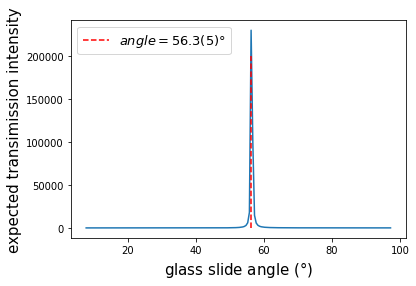

In [1094]:
theta_0 = 56.25187202

g = plt.figure(figsize=(6,4))
plt.plot(count+42.75187202-180, arr)
plt.plot([theta_0,theta_0], [-10,2e5], 'r--', label='$angle = 56.3(5)\degree$')

plt.ylabel('expected transimission intensity', fontsize=15)
plt.xlabel('glass slide angle ($\degree$)', fontsize=15)
plt.legend(fontsize=13)
plt.savefig('2_2.pdf', bbox_inches='tight')
plt.show()

In [937]:
indexAtFirstMax = 110
indexAtSecondMax = 290
adcValuesnp = adcValuesnp[indexAtFirstMax:indexAtSecondMax]
count = count[indexAtFirstMax:indexAtSecondMax]

poly1DFunction = np.poly1d(polyfitCoefficients(count, adcValuesnp, 3)[0]) 